# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import statsmodels.api as sm

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame([{"StudentsID": 1, "Age": 17, "Tardies": 10},
                        {"StudentsID": 2, "Age": 51, "Tardies": 1},
                        {"StudentsID": 3, "Age": 27, "Tardies": 5},
                        {"StudentsID": 4, "Age": 21, "Tardies": 9},
                        {"StudentsID": 5, "Age": 36, "Tardies": 4},
                        {"StudentsID": 6, "Age": 48, "Tardies": 2},
                        {"StudentsID": 7, "Age": 19, "Tardies": 9},
                        {"StudentsID": 8, "Age": 26, "Tardies": 6},
                        {"StudentsID": 9, "Age": 54, "Tardies": 0},
                        {"StudentsID": 10, "Age": 30, "Tardies": 3}])

student_data

,StudentsID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

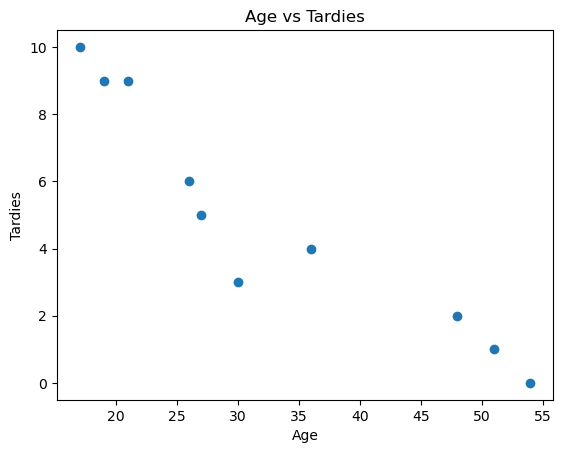

In [3]:
plt.scatter(student_data["Age"], student_data["Tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Age vs Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

There is a clear trend that points that the older a student is, the smaller is the tardiness.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
#correlation:
correlation_tardies = student_data.corr()

correlation_tardies

,StudentsID,Age,Tardies
StudentsID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [5]:
#covariance:
covariance_tardies = student_data.cov()

covariance_tardies

,StudentsID,Age,Tardies
StudentsID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


Correlation is the correct method, since it gives us a simple answer -> negative correlation. The younger the student, the higher the tardiness.

In [6]:
# Pearson
pearsonr(student_data["Age"], student_data["Tardies"])

PearsonRResult(statistic=-0.9391626886887121, pvalue=5.5666538345534396e-05)

In [7]:
# Spearman
spearmanr(student_data["Age"], student_data["Tardies"])

SignificanceResult(statistic=-0.9848069807617047, pvalue=2.2888344854823716e-07)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [28]:
x = student_data["Age"].values.reshape(-1,1)
y = student_data["Tardies"]

model = LinearRegression()
model.fit(x, y)
slope = model.coef_
interception = model.intercept_

Plot your regression model on your scatter plot.

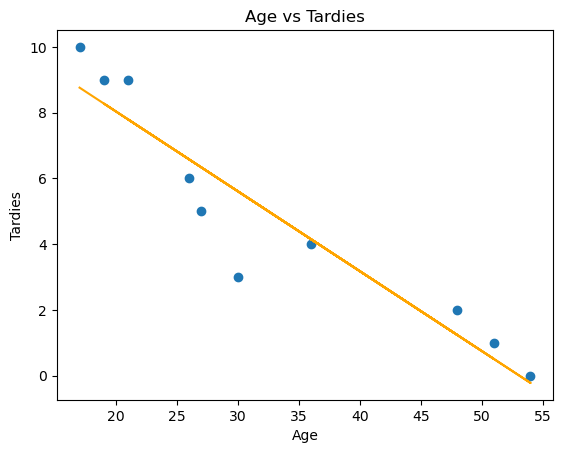

In [27]:
reg_line_tardies = interception + slope*x

plt.plot(x, reg_line_tardies, c = "orange")

plt.scatter(student_data["Age"], student_data["Tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Age vs Tardies")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

# Your response here. 










## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
vehicles = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day4/lab-regression-analysis/your-code/vehicles.csv")

vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [26]:
year_vs_co2 = vehicles["Year"].corr(vehicles["CO2 Emission Grams/Mile"])
cylinders_vs_co2 = vehicles["Cylinders"].corr(vehicles["CO2 Emission Grams/Mile"])
fuel_barrels_vs_co2 = vehicles["Fuel Barrels/Year"].corr(vehicles["CO2 Emission Grams/Mile"])
combined_mpg_vs_co2 = vehicles["Combined MPG"].corr(vehicles["CO2 Emission Grams/Mile"])
fuel_cost_vs_co2 = vehicles["Fuel Cost/Year"].corr(vehicles["CO2 Emission Grams/Mile"])

print(f"Year vs CO2: {year_vs_co2}")
print(f"Cylinders vs CO2: {cylinders_vs_co2}")
print(f"Fuel Barrels/Year: {fuel_barrels_vs_co2}")
print(f"Combined MPG vs CO2: {combined_mpg_vs_co2 }")
print(f"Fuel Cost/Year vs CO2: {fuel_cost_vs_co2}")

Year vs CO2: -0.22229960295054227
Cylinders vs CO2: 0.7523925537297491
Fuel Barrels/Year: 0.9861886621428735
Combined MPG vs CO2: -0.9262290389336436
Fuel Cost/Year vs CO2: 0.9308651512201843


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

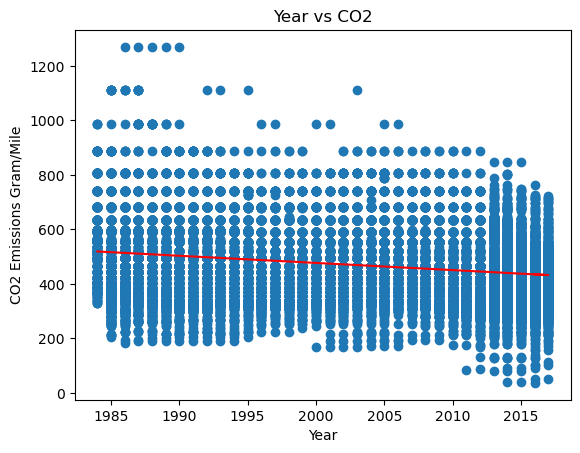

In [43]:
# Year vs CO2

x = vehicles["Year"].values.reshape(-1,1)
y = vehicles["CO2 Emission Grams/Mile"]

model_year = LinearRegression()
model_year.fit(x, y)
slope_year = model_year.coef_
interception = model_year.intercept_

reg_line_year = interception + slope_year*x

plt.plot(x, reg_line_year, c = "red")

plt.scatter(vehicles["Year"], vehicles["CO2 Emission Grams/Mile"])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions Gram/Mile")
plt.title("Year vs CO2")
plt.show()


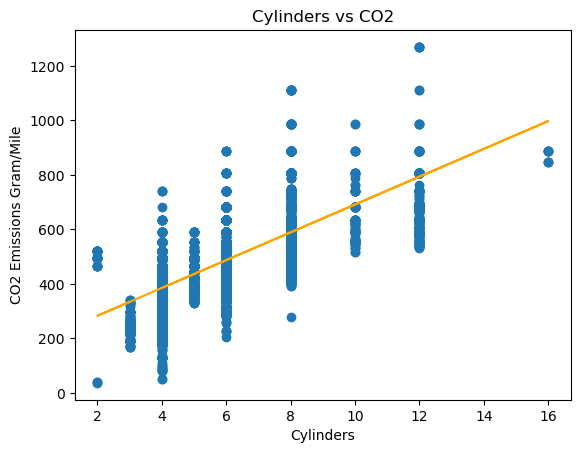

In [44]:
# Cylinders vs CO2

x = vehicles["Cylinders"].values.reshape(-1,1)
y = vehicles["CO2 Emission Grams/Mile"]

model_cylinders = LinearRegression()
model_cylinders.fit(x, y)
slope_cylinders = model_cylinders.coef_
interception = model_cylinders.intercept_

reg_line_cylinders = interception + slope_cylinders*x

plt.plot(x, reg_line_cylinders, c = "orange")

plt.scatter(vehicles["Cylinders"], vehicles["CO2 Emission Grams/Mile"])
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions Gram/Mile")
plt.title("Cylinders vs CO2")
plt.show()

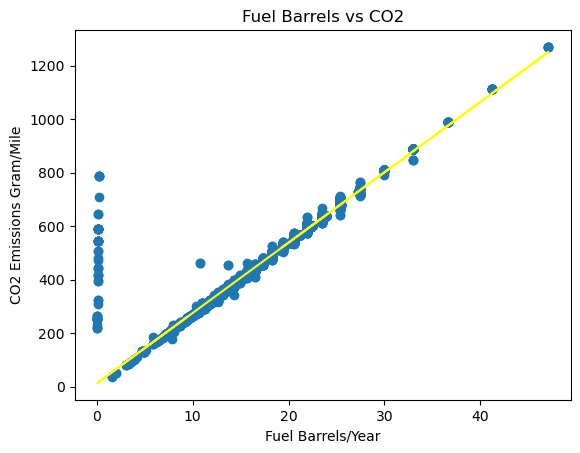

In [45]:
# Fuel Barrels vs CO2

x = vehicles["Fuel Barrels/Year"].values.reshape(-1,1)
y = vehicles["CO2 Emission Grams/Mile"]

model_fuel_barrels = LinearRegression()
model_fuel_barrels.fit(x, y)
slope_fuel_barrels = model_fuel_barrels.coef_
interception = model_fuel_barrels.intercept_

reg_line_fuel_barrels = interception + slope_fuel_barrels*x

plt.plot(x, reg_line_fuel_barrels, c = "yellow")

plt.scatter(vehicles["Fuel Barrels/Year"], vehicles["CO2 Emission Grams/Mile"])
plt.xlabel("Fuel Barrels/Year")
plt.ylabel("CO2 Emissions Gram/Mile")
plt.title("Fuel Barrels vs CO2")
plt.show()

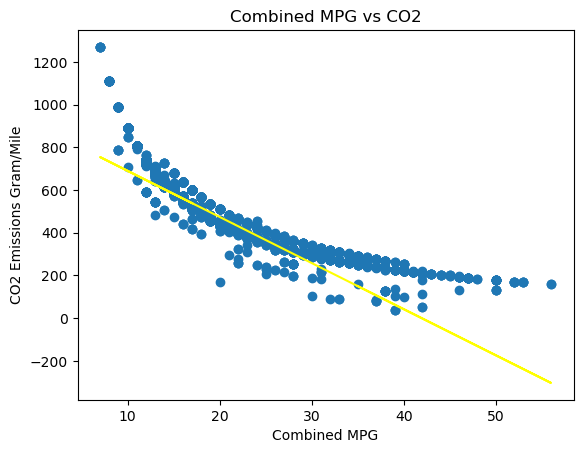

In [46]:
# Combined MPG vs CO2

x = vehicles["Combined MPG"].values.reshape(-1,1)
y = vehicles["CO2 Emission Grams/Mile"]

model_combined_mpg = LinearRegression()
model_combined_mpg.fit(x, y)
slope_combined_mpg = model_combined_mpg.coef_
interception = model_combined_mpg.intercept_

reg_line_combined_mpg = interception + slope_combined_mpg*x

plt.plot(x, reg_line_combined_mpg, c = "yellow")

plt.scatter(vehicles["Combined MPG"], vehicles["CO2 Emission Grams/Mile"])
plt.xlabel("Combined MPG")
plt.ylabel("CO2 Emissions Gram/Mile")
plt.title("Combined MPG vs CO2")
plt.show()

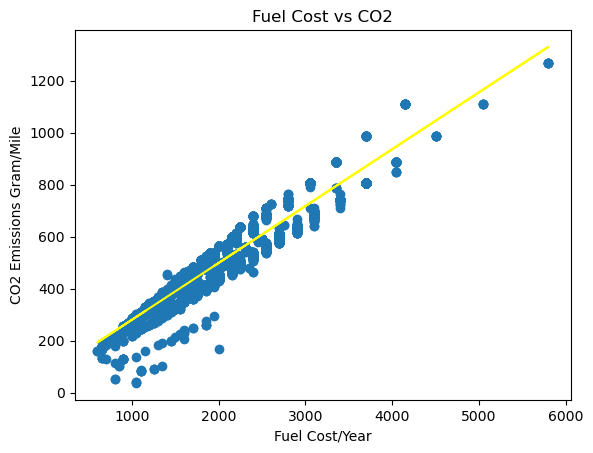

In [47]:
# Fuel Cost vs CO2

x = vehicles["Fuel Cost/Year"].values.reshape(-1,1)
y = vehicles["CO2 Emission Grams/Mile"]

model_fuel_cost = LinearRegression()
model_fuel_cost.fit(x, y)
slope_fuel_cost = model_fuel_cost.coef_
interception = model_fuel_cost.intercept_

reg_line_fuel_cost = interception + slope_fuel_cost*x

plt.plot(x, reg_line_fuel_cost, c = "yellow")

plt.scatter(vehicles["Fuel Cost/Year"], vehicles["CO2 Emission Grams/Mile"])
plt.xlabel("Fuel Cost/Year")
plt.ylabel("CO2 Emissions Gram/Mile")
plt.title("Fuel Cost vs CO2")
plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [53]:
# Year vs CO2

vehicles["pred"] = model_year.predict(vehicles[["Year"]])

print("Mean squared error of Year vs CO2 is: ", mean_squared_error(vehicles["Year"], vehicles["pred"]))

print("Root Mean squared error of Year vs CO2 is: ", np.sqrt(mean_squared_error(vehicles["Year"], vehicles["pred"])))

Mean squared error of Year vs CO2 is:  2328181.3888244266
Root Mean squared error of Year vs CO2 is:  1525.8379300647978


/Users/camilaschroeder/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [54]:
# Cylinders vs CO2

vehicles["pred"] = model_cylinders.predict(vehicles[["Cylinders"]])

print("Mean squared error of Cylinders vs CO2 is: ", mean_squared_error(vehicles["Cylinders"], vehicles["pred"]))

print("Root Mean squared error of Cylinders vs CO2 is: ", np.sqrt(mean_squared_error(vehicles["Cylinders"], vehicles["pred"])))

Mean squared error of Cylinders vs CO2 is:  228191.4352656107
Root Mean squared error of Cylinders vs CO2 is:  477.69387191548805


/Users/camilaschroeder/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [55]:
# Fuel Barrels / Year

vehicles["pred"] = model_fuel_barrels.predict(vehicles[["Fuel Barrels/Year"]])

print("Mean squared error of Fuel Barrels/Year vs CO2 is: ", mean_squared_error(vehicles["Fuel Barrels/Year"], vehicles["pred"]))

print("Root Mean squared error of Fuel Barrels/Year vs CO2 is: ", np.sqrt(mean_squared_error(vehicles["Fuel Barrels/Year"], vehicles["pred"])))

Mean squared error of Fuel Barrels/Year vs CO2 is:  222253.10239335685
Root Mean squared error of Fuel Barrels/Year vs CO2 is:  471.4372730208727


/Users/camilaschroeder/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [56]:
# Combined MPG

vehicles["pred"] = model_combined_mpg.predict(vehicles[["Combined MPG"]])

print("Mean squared error of Combined MPG vs CO2 is: ", mean_squared_error(vehicles["Combined MPG"], vehicles["pred"]))

print("Root Mean squared error of Combined MPG vs CO2 is: ", np.sqrt(mean_squared_error(vehicles["Combined MPG"], vehicles["pred"])))


Mean squared error of Combined MPG vs CO2 is:  220691.8063470286
Root Mean squared error of Combined MPG vs CO2 is:  469.7784651801619


/Users/camilaschroeder/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [57]:
#Fuel Cost / Year

vehicles["pred"] = model_fuel_cost.predict(vehicles[["Fuel Cost/Year"]])

print("Mean squared error of Fuel Cost/Year vs CO2 is: ", mean_squared_error(vehicles["Fuel Cost/Year"], vehicles["pred"]))

print("Root Mean squared error of Fuel Cost/Year vs CO2 is: ", np.sqrt(mean_squared_error(vehicles["Fuel Cost/Year"], vehicles["pred"])))


Mean squared error of Fuel Cost/Year vs CO2 is:  2165602.5242449236
Root Mean squared error of Fuel Cost/Year vs CO2 is:  1471.5986287860298


/Users/camilaschroeder/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [60]:
party = pd.DataFrame([{"Invited" : 1, "Attended" : 1},
         {"Invited" : 3, "Attended" : 2},
         {"Invited" : 4, "Attended" : 4},
         {"Invited" : 6, "Attended" : 4},
         {"Invited" : 8, "Attended" : 5},
         {"Invited" : 9, "Attended" : 7},
         {"Invited" : 11, "Attended" : 8},
         {"Invited" : 14, "Attended" : 13}])

party


,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

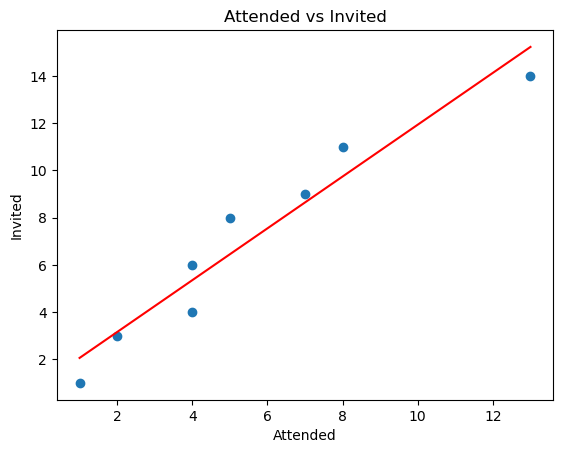

In [64]:
x = party["Attended"].values.reshape(-1,1)
y = party["Invited"]

model_party = LinearRegression()
model_party.fit(x, y)
slope_party = model_party.coef_
interception = model_party.intercept_

reg_line_party = interception + slope_party*x

plt.plot(x, reg_line_party, c = "red")

plt.scatter(party["Attended"], party["Invited"])
plt.xlabel("Attended")
plt.ylabel("Invited")
plt.title("Attended vs Invited")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

The more people invited, the more attend.

In [63]:
reg_line_party

array([[ 0.40909091],
       [ 2.10606061],
       [ 2.95454545],
       [ 4.65151515],
       [ 6.34848485],
       [ 7.1969697 ],
       [ 8.89393939],
       [11.43939394]])

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

The first row needs to be removed - only one person invited.

In [65]:
party2 = pd.DataFrame([{"Invited" : 3, "Attended" : 2},
         {"Invited" : 4, "Attended" : 4},
         {"Invited" : 6, "Attended" : 4},
         {"Invited" : 8, "Attended" : 5},
         {"Invited" : 9, "Attended" : 7},
         {"Invited" : 11, "Attended" : 8},
         {"Invited" : 14, "Attended" : 13}])

party2


,Invited,Attended
0,3,2
1,4,4
2,6,4
3,8,5
4,9,7
5,11,8
6,14,13


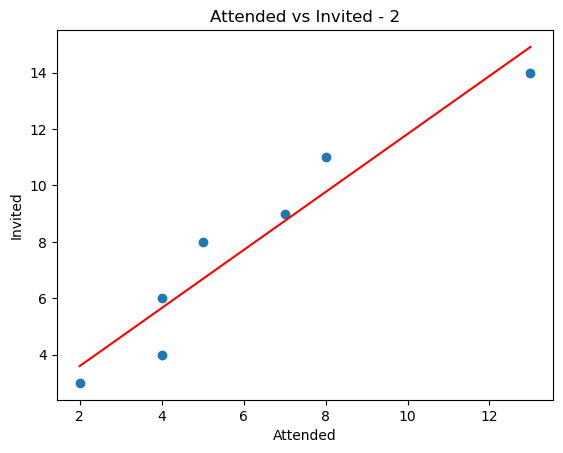

In [68]:
x = party2["Attended"].values.reshape(-1,1)
y = party2["Invited"]

model_party2 = LinearRegression()
model_party2.fit(x, y)
slope_party2 = model_party2.coef_
interception = model_party2.intercept_

reg_line_party2 = interception + slope_party2*x

plt.plot(x, reg_line_party2, c = "red")

plt.scatter(party2["Attended"], party2["Invited"])
plt.xlabel("Attended")
plt.ylabel("Invited")
plt.title("Attended vs Invited - 2")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Nothing changed, actually. The conclusion is still the same.